# <img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=200 height=150 />
* Guillermo Kirby
* 22 años
* sexto semestre
<table>
  <tr>
    <th>Prosesador</th>
    <th>Memoria</th>
    <th>Tipo de Sistema</th>
  </tr>
  <tr>
    <td>Intel(R)Core(TM)i3-5005U CPU @ 2.00GHz 2.00GHz</td>
    <td>4.00GB</td>
    <td>Sitema opertivo 64, prosesadorx64</td>
  </tr>
    

In [1]:
###llamar biophyton
!pip install biopython
!pip install reportlab
!pip install nglview

# Ejercicio 1 [2 puntos]
### Cree el archivo miningscience.py con las siguientes dos funciones:

i. download_pubmed: para descargar la data de PubMed utilizando el ENTREZ de Biopython. El parámetro de entrada para la función es el keyword.

ii. science_plots: la función debe

utilizar como argumento de entrada la data descargada por download_pubmed
ordenar los conteos de autores por país en orden ascedente y
seleccionar los cinco más abundantes. Con esta selección debe graficar un pie_plot. Como guía para el conteo por países puede usar el ejemplo de MapOfScience.
iii Cree un docstring para cada función.

Luego de crear las funciones, cargue el módulo miningscience como msc e imprima docstring de cada función.

# Ejercicio 2 [2 puntos]
### Utilice dos veces la función download_pubmed para:

Descargar la data, utilizando los keyword de su preferencia.
Guardar el archivo descargado en la carpeta data.
Para cada corrida, imprima lo siguiente:

'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX

In [1]:
import miningscience_g01

In [2]:
help(miningscience_g01.download_pudmed)
help(miningscience_g01.scince_plots)

Help on function download_pudmed in module miningscience_g01:

download_pudmed(keyword)
    Esta funcion busca una palabra clave en la bace de datos PubMed usando el paquete Entrez de Biopython
    Para usarlo, se debe especificar lo siguiente download_pudmed(keyword)
    La funcion devuelve un diccionario con los IDs de las publicaciones, un conteo de cuantas publicaciones 
    y demas informacion en un diccionario

Help on function scince_plots in module miningscience_g01:

scince_plots(dowload_pudmed)
    se utiliza download_pubmed y oredena los conteos por autores por pais en orden acendente y selecciona los 5 mas abundantes



In [3]:
orquideas = miningscience_g01.download_pudmed("orchids")

print("El número de artículos para orchids es"  + str(len(orquideas)))



El número de artículos para orchids es1000


In [4]:

vacas = miningscience_g01.download_pudmed("cows")

print("El número de artículos para cows es:" + str(len(vacas)))


El número de artículos para cows es:1000


# Ejercicio 3 [1.5 puntos]
### Utilice dos veces la función science_plots para:

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta img

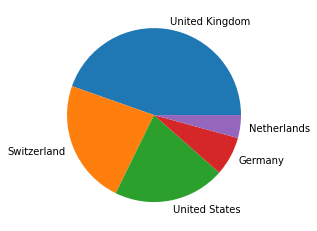

In [7]:
miningscience_g01.scince_plots(orquideas)

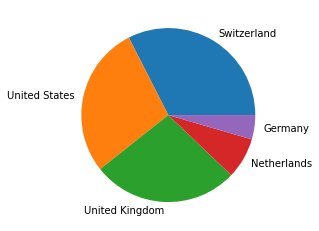

In [6]:
miningscience_g01.scince_plots(vacas)

# Ejercicio 4 [1 punto]
### Interprete los resultados de las figuras del ejercicio 3
#### imagen #1
- los 5 paises donde mas se publican hacerca de orquideas son Reino Unido, Suiza, Estados Unidos, Alemania y Holanda de forma acendente respectivamente
#### imagen #2
- los 5 paises donde mas se publican de vacas som: Suiza, Estados Unidos, Reino Unido, Olanda y Alemania de forma acendente respectivamente

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&rettype=gb&retmode=text&id=NM_001201483.4%2CNM_164434.3%2CXM_002185475.1%2CNM_001169382.2%2CXM_020578711.1%2CXM_047982770.1%2CNM_164432.3%2CNM_164433.3%2CNM_164431.3%2CXM_046082301.1%2CXM_024470490.1%2CNM_129209.4%2CNM_128509.4%2CNM_106062.4%2CKJ649284.1&tool=biopython&email=A.N.Other%40example.com
C:\Users\user\Downloads\ClustalW2\clustalw2.exe -infile=data/secuencia.fasta


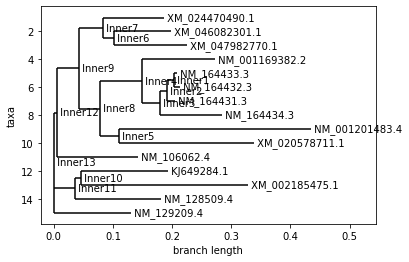

<Figure size 432x288 with 0 Axes>

In [13]:
from Bio import Entrez
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
with open('data/sequence.seq') as file:
    text = file.read()
text = text.split('\n')
text = ','.join(text[:15])

handle = Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id = text)
print(handle.url)
records = SeqIO.parse("data/secuencia.gb", "genbank") 
count = SeqIO.write(records, "data/secuencia.fasta", "fasta") 

clustalw_exe = r"C:\Users\user\Downloads\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/secuencia.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

ClustalAlign = AlignIO.read("data/secuencia.aln", "clustal")

with open("data/secuencia.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor(calculator)
rag2_tree = constructor.build_tree(alignment)
rag2_tree.rooted = True
Phylo.draw(rag2_tree)
plt.savefig("img/arbol.pdf")

##### interpretaion
- se puede observar que las ezimas se mantienen con sus familas siendo la secuencia mas alejada del resto la NM_001201483.4 el resto de scuencias fueron un poco mejores aunque para sacar una verdadera conclucion se tendria que hacer un analicis mas profundo de cada una de las especies y familias a las que pertenecen las enzimas 